<a href="https://colab.research.google.com/github/anjum-azra/Air-Quality-Index-Prediction-AICTE-Cycle-4/blob/main/air_quality_index_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
# @title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [80]:
df=pd.read_csv('/content/432c92d7855c48075139.csv')

In [81]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [82]:
df.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [83]:
df.shape

(29531, 16)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [85]:
df.duplicated().sum()

0

In [86]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


In [87]:
df.dropna(subset=['AQI'],inplace=True)
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [89]:
null_value_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_value_percentage

,0
Xylene,61.859155
PM10,28.515091
NH3,26.301811
Toluene,23.444668
Benzene,14.225352
NOx,7.472837
O3,3.247485
PM2.5,2.728370
SO2,2.434608
CO,1.790744


**key considerations**


*  Xylene has hightest percentage of missing values:61.86%

* PM10 and NH3 28-26%




# ***WEEK-2 - VISUALISATION***

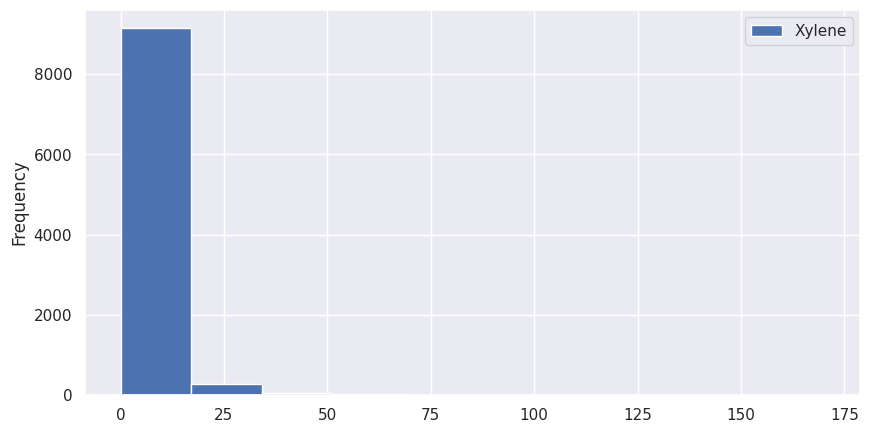

In [90]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

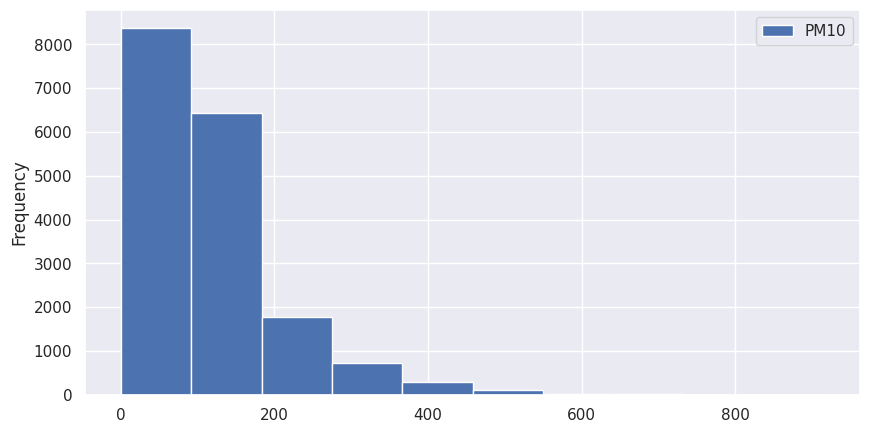

In [91]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

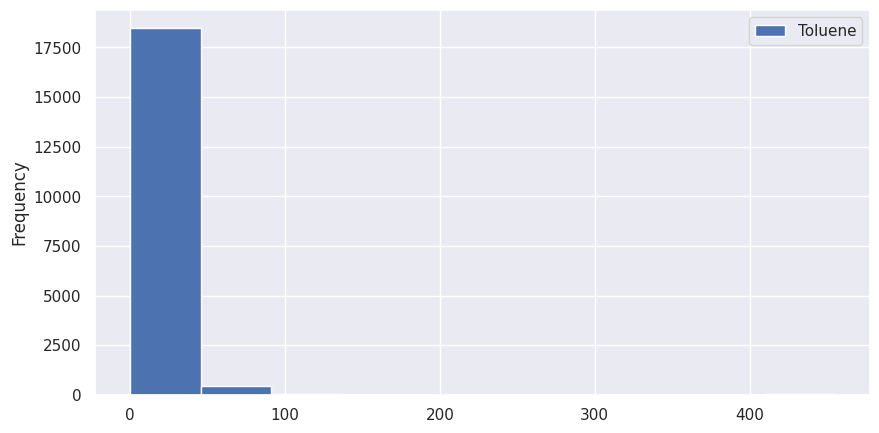

In [92]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

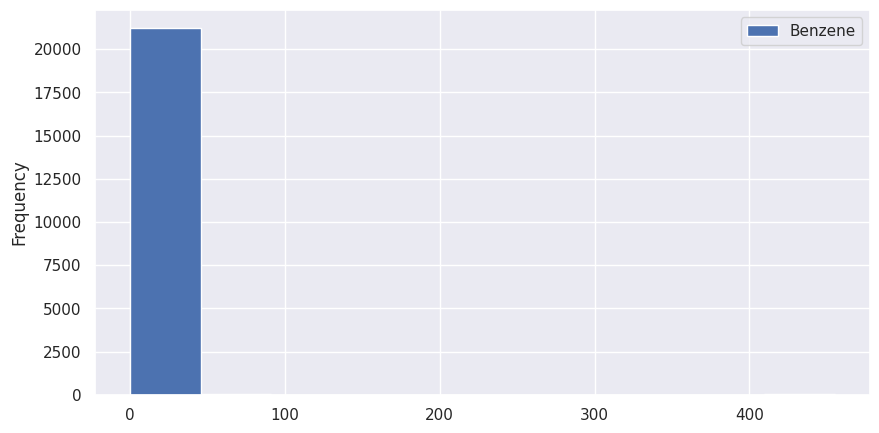

In [93]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

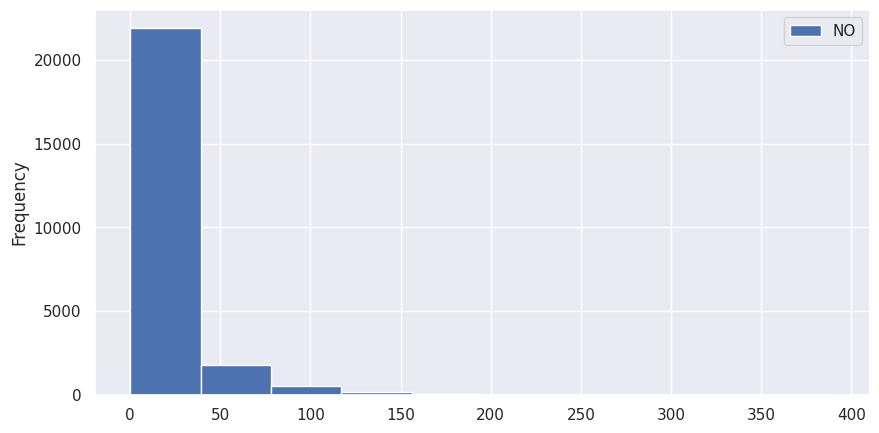

In [94]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

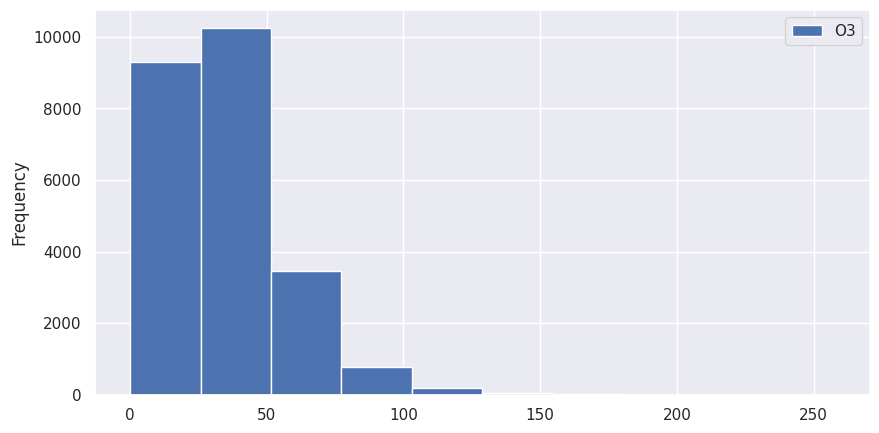

In [95]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

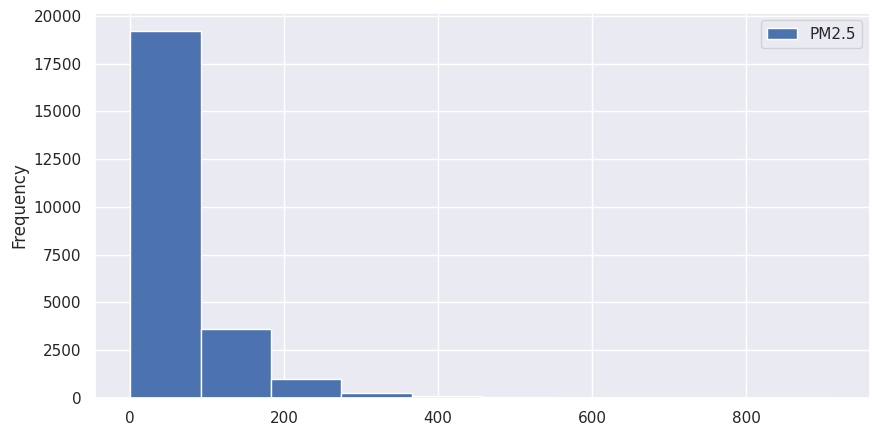

In [96]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

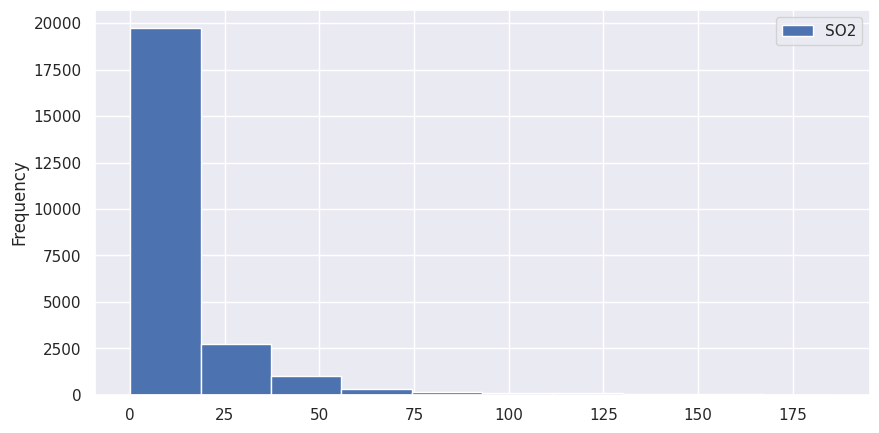

In [97]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

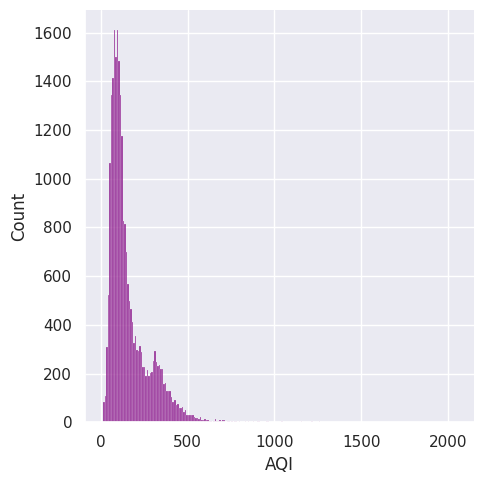

In [98]:
sns.displot(df,x='AQI',color='purple')
plt.show()

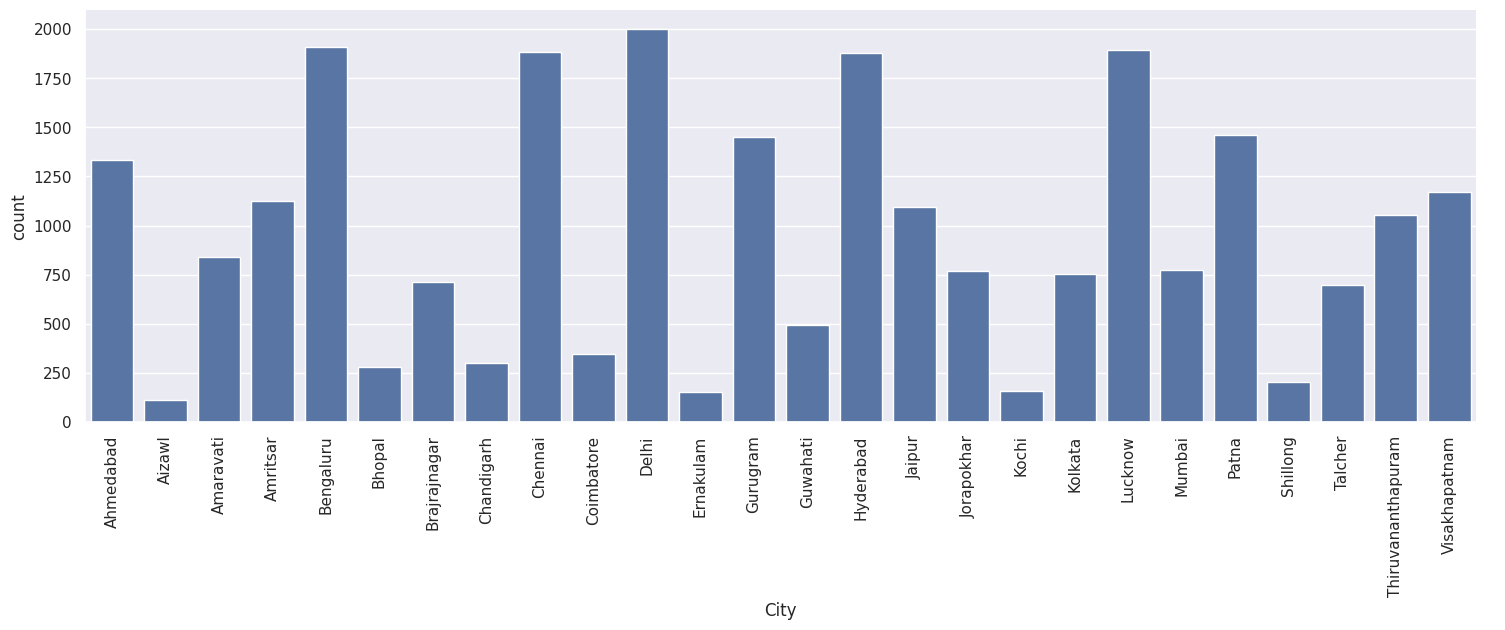

In [99]:
sns.set_theme(style='darkgrid')
graph=sns.catplot(x='City',kind='count',data=df,height=5,aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()

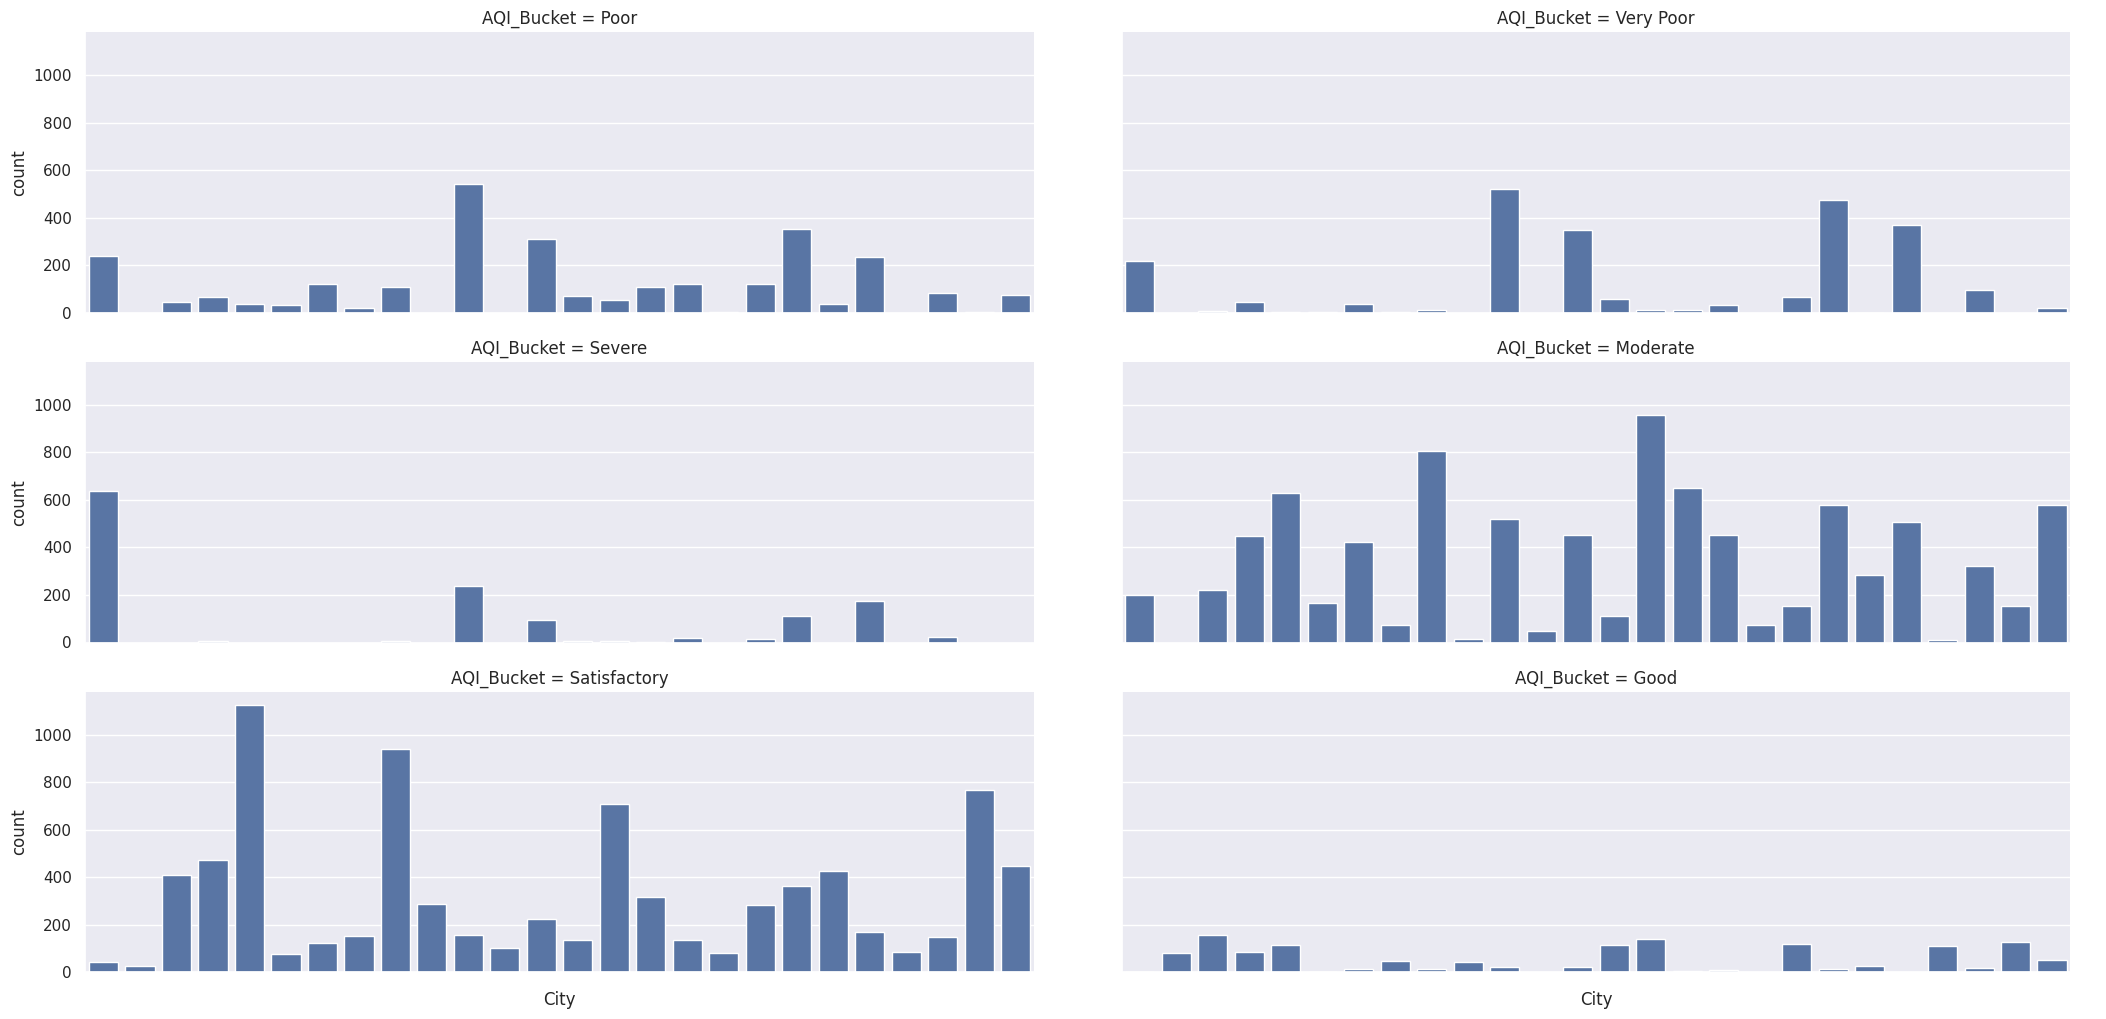

In [100]:
sns.set_theme(style='darkgrid')
graph=sns.catplot(x='City',kind='count',data=df,col='AQI_Bucket',height=3.5,col_wrap=2,aspect=3)
graph.set_xticklabels(rotation=90)
plt.show()

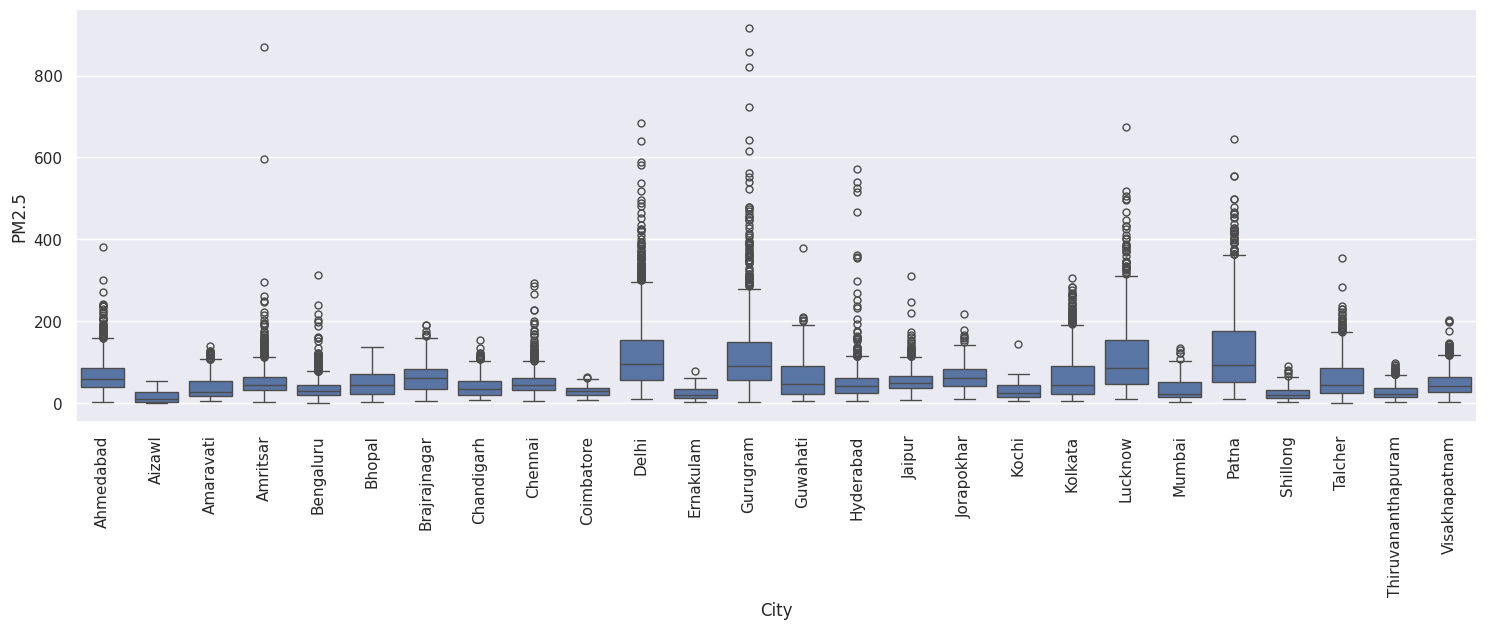

In [101]:
graph2=sns.catplot(x='City',y='PM2.5',kind='box',data=df,height=5,aspect=3)
graph2.set_xticklabels(rotation=90)
plt.show()

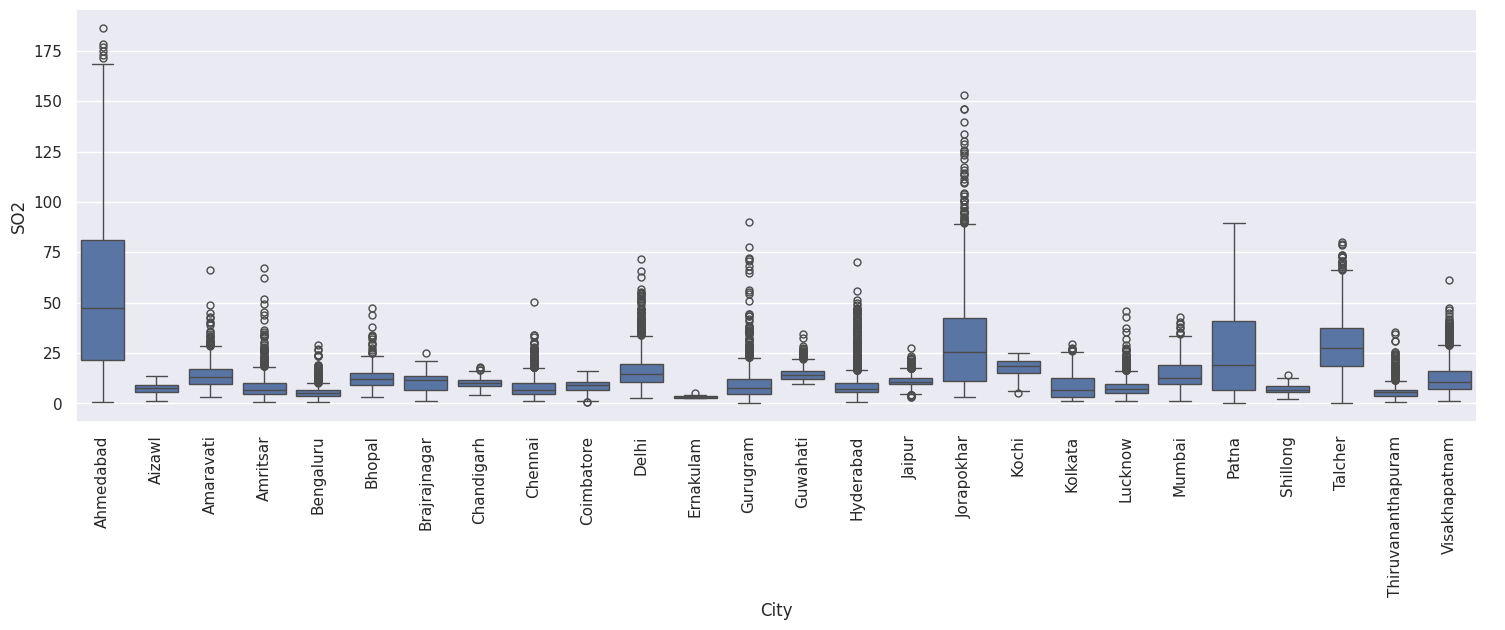

In [102]:
graph3=sns.catplot(x='City',y='SO2',kind='box',data=df,height=5,aspect=3)
graph3.set_xticklabels(rotation=90)
plt.show()

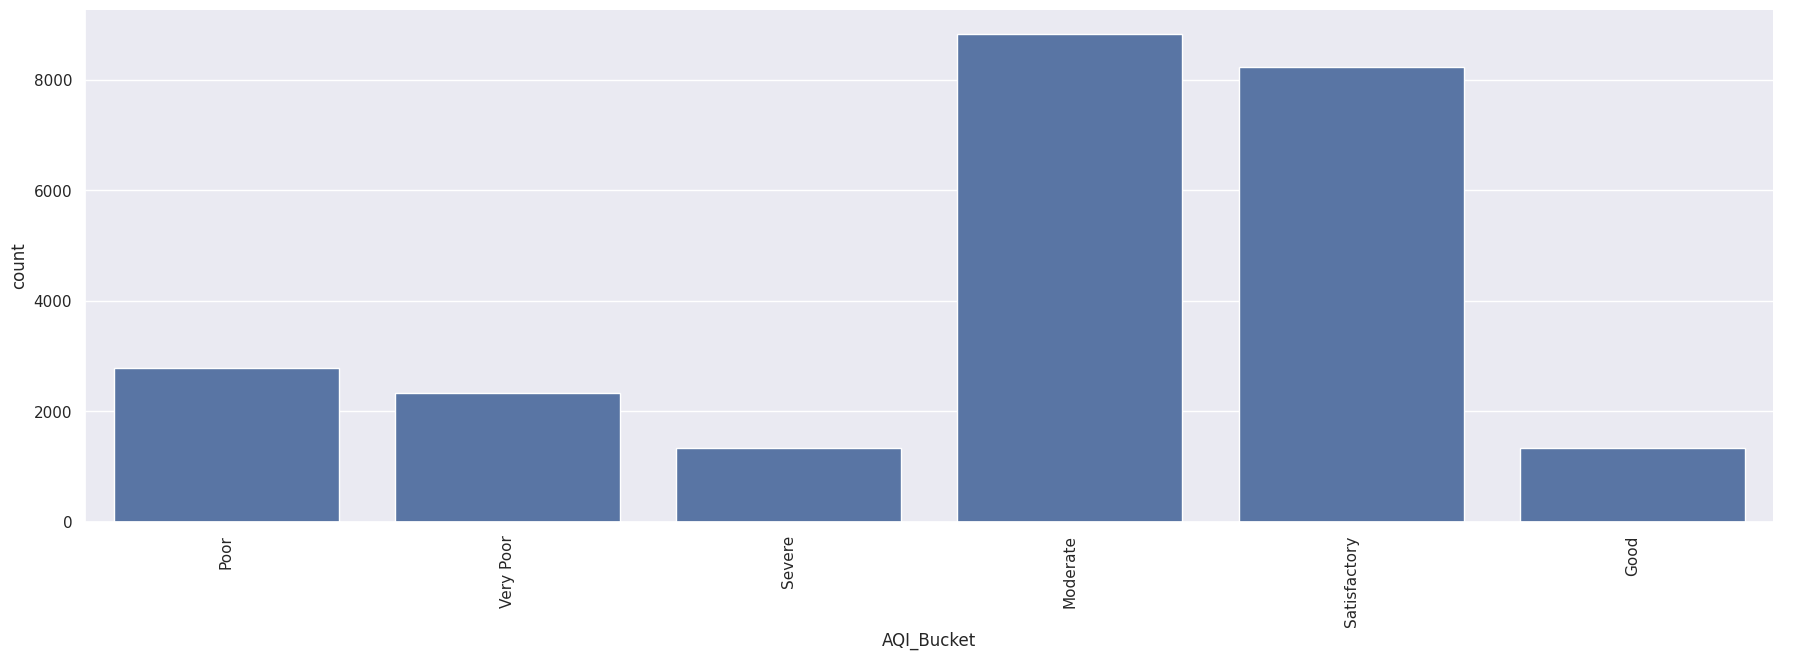

In [103]:
graph4=sns.catplot(x='AQI_Bucket',kind='count',data=df,height=6,aspect=3)
graph4.set_xticklabels(rotation=90)
plt.show()

In [104]:
df.isnull().sum().sort_values(ascending=False)

,0
Xylene,15372
PM10,7086
NH3,6536
Toluene,5826
Benzene,3535
NOx,1857
O3,807
PM2.5,678
SO2,605
CO,445


In [105]:
df.describe().loc['mean']

,mean
PM2.5,67.476613
PM10,118.454435
NO,17.622421
NO2,28.978391
NOx,32.289012
NH3,23.848366
CO,2.345267
SO2,14.362933
O3,34.912885
Benzene,3.458668


In [106]:
df=df.replace({"PM2.5":{np.nan:67.476613},"O3":{np.nan:34.912885},
               "PM10":{np.nan:118.454435},"Benzene":{np.nan:3.458668},
               "NO":{np.nan:17.622421},"Toluene":{np.nan:9.525714},
               "NO2":{np.nan:28.978391},"Xylene":{np.nan:3.588683},
               "NH3":{np.nan:23.848366},"AQI":{np.nan:166.463581},
               "CO":{np.nan:2.345267},"NOx":{np.nan:32.289012},
               "SO2":{np.nan:14.362933}


})

In [107]:
df.isnull().sum().sort_values(ascending=False)

,0
City,0
Date,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0


In [108]:
df=df.drop(['AQI_Bucket'],axis=1)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     24850 non-null  object 
 1   Date     24850 non-null  object 
 2   PM2.5    24850 non-null  float64
 3   PM10     24850 non-null  float64
 4   NO       24850 non-null  float64
 5   NO2      24850 non-null  float64
 6   NOx      24850 non-null  float64
 7   NH3      24850 non-null  float64
 8   CO       24850 non-null  float64
 9   SO2      24850 non-null  float64
 10  O3       24850 non-null  float64
 11  Benzene  24850 non-null  float64
 12  Toluene  24850 non-null  float64
 13  Xylene   24850 non-null  float64
 14  AQI      24850 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.0+ MB


In [110]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


<Axes: >

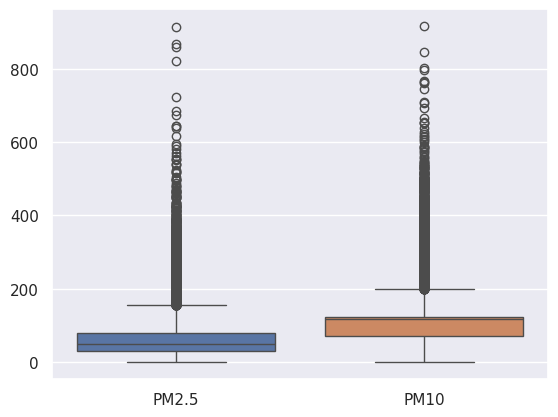

In [111]:
sns.boxplot(data=df[['PM2.5','PM10']])

<Axes: >

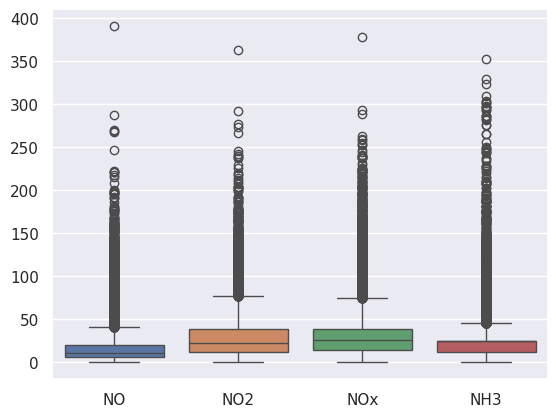

In [112]:
sns.boxplot(data=df[['NO','NO2','NOx','NH3']])

<Axes: >

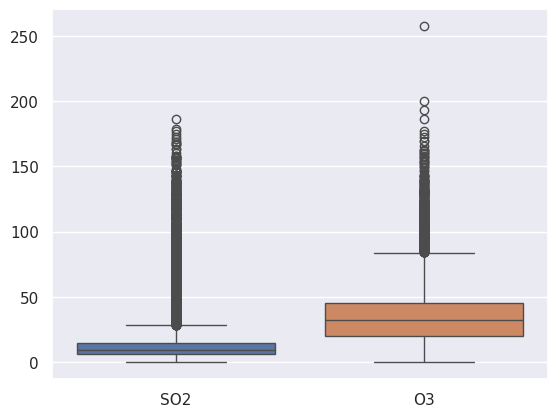

In [113]:
sns.boxplot(data=df[['SO2','O3']])

In [118]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(
            lambda x: Q1 if x < lb else (Q3 if x > ub else x)
        )
    return df


In [115]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     24850 non-null  object 
 1   Date     24850 non-null  object 
 2   PM2.5    24850 non-null  float64
 3   PM10     24850 non-null  float64
 4   NO       24850 non-null  float64
 5   NO2      24850 non-null  float64
 6   NOx      24850 non-null  float64
 7   NH3      24850 non-null  float64
 8   CO       24850 non-null  float64
 9   SO2      24850 non-null  float64
 10  O3       24850 non-null  float64
 11  Benzene  24850 non-null  float64
 12  Toluene  24850 non-null  float64
 13  Xylene   24850 non-null  float64
 14  AQI      24850 non-null  float64
dtypes: float64(13), object(2)
memory usage: 3.5+ MB


In [119]:
df = replace_outliers(df)

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24850.0,55.174281,31.829575,0.04,29.56,50.165000,79.505625,154.30
PM10,24850.0,101.351323,39.079916,0.03,71.78,118.454435,122.955625,199.70
NO,24850.0,12.507694,8.762015,0.03,5.72,10.075000,19.710000,40.68
NO2,24850.0,25.901114,16.669494,0.01,12.09,22.535000,37.910000,76.62
NOx,24850.0,26.574513,16.138682,0.00,14.03,25.720000,38.170000,74.38
NH3,24850.0,19.486584,9.630370,0.01,11.28,23.848366,24.710000,44.85
CO,24850.0,1.040507,0.615436,0.00,0.59,0.950000,1.530000,2.94
SO2,24850.0,10.334743,5.680901,0.01,5.79,9.430000,14.890000,28.52
O3,24850.0,33.177781,17.487724,0.01,19.64,32.060000,45.395625,83.99
Benzene,24850.0,2.098520,1.828135,0.00,0.34,1.810000,3.458668,8.13


<Axes: >

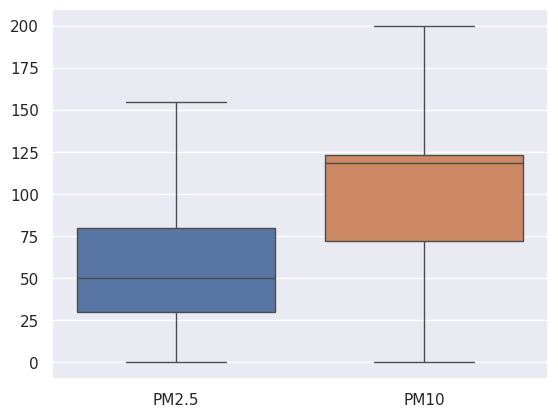

In [121]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

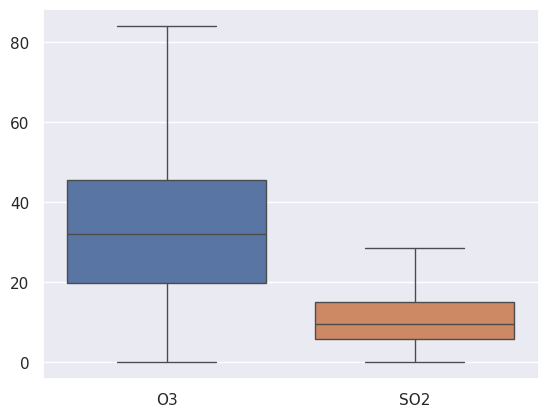

In [122]:
sns.boxplot(data=df[['O3', 'SO2']])

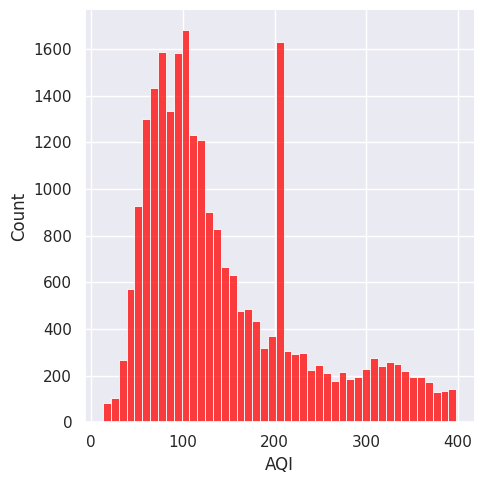

In [123]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [136]:
df1 = df.drop(columns=['City'])


In [134]:
df1 = df.drop(columns=['Date'])

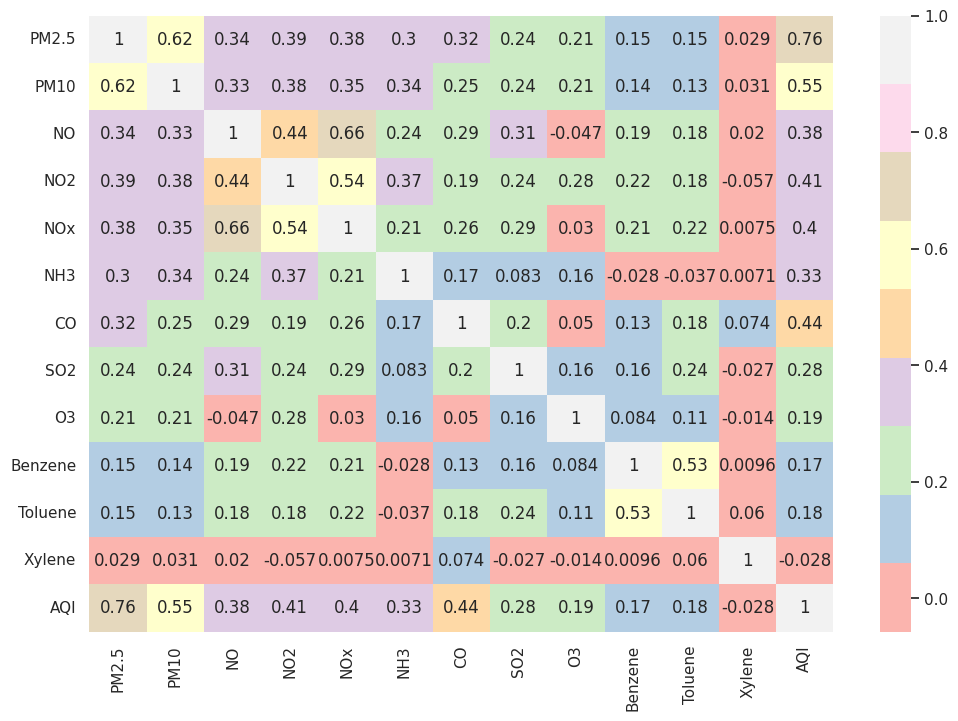

In [138]:
df1 = df.drop(columns=['Date', 'City'])

# Calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, cmap='Pastel1')
plt.show()